The model trains on the **Malaria Cell Images Dataset**. It uses a CNN to classify the images.

**Importing Necessary Libraries**

In [1]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
from keras.preprocessing.image import *
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import os


Using TensorFlow backend.


**Preparing Data**

In this section, images are loaded and converted into numpy arrays. At the same time labels for them are set.
0 : Parasitized, 1 : Uninfected

In [2]:
infected = os.listdir('../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized')
uninfected = os.listdir('../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected')
data = []
labels = []
for i in infected:
    try:
        image = cv2.imread('../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/'+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        data.append(np.array(resize_img))
        labels.append(0)
        
    except AttributeError:
        print("")

for b in uninfected:
    try:
        image=cv2.imread('../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/'+b)
        image_from_array = Image.fromarray(image, 'RGB')
        resize_img = image_array.resize((64, 64))
        data.append(np.array(resize_img))
        labels.append(1)
    except AttributeError:
        print("")
        
data = np.array(data)
labels = np.array(labels)

**Splitting the data**

Data is split into 3 subsets: Training set, Validation set, Test set


In [3]:
train_data , x , train_label , y = train_test_split(data,labels,test_size = 0.2,random_state = 123)
val_data , test_data , val_label , test_label = train_test_split(x,y,test_size = 0.5,random_state = 123)

**Visualizing the sub-sets**

Just to see if there is an approximate equal samples of both infected and uninfected in all 3 subsets, plotting the labels.

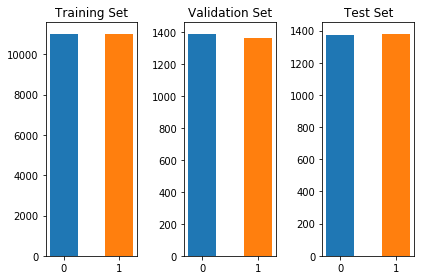

In [4]:
val,occ = np.unique(train_label, return_counts = True)
val1,occ1= np.unique(val_label, return_counts = True)
val2,occ2 = np.unique(test_label, return_counts = True)

x_ax = ['0','1']
plt.subplot(1,3,1)
plt.bar(x_ax,occ,color = ['C0','C1'], width = 0.5)
plt.title("Training Set")
plt.subplot(1,3,2)
plt.bar(x_ax,occ1,color = ['C0','C1'], width = 0.5)
plt.title("Validation Set")
plt.subplot(1,3,3)
plt.bar(x_ax,occ2,color = ['C0','C1'], width = 0.5)
plt.title("Test Set")
plt.tight_layout()
plt.show()

**Building the model**

A sequential model is used.

In [5]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (64,64,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units =256,activation = 'relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**Layers of the model and summary:**


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

**Batches of images**

Images are fed to the model in batches. To generate those batches ImageDataGenerator is used.

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.25,zoom_range=0.25,horizontal_flip=True,vertical_flip=True)  
val_datagen= ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow(train_data,train_label, batch_size=16)
val_gen = val_datagen.flow(val_data,val_label, batch_size=16)
test_gen = val_datagen.flow(test_data,test_label, batch_size =1, shuffle = False)

STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_VALID=val_gen.n//val_gen.batch_size
STEP_SIZE_TEST=test_gen.n//test_gen.batch_size

**Training the model**

The model is trained for no of epochs = 5


In [8]:
ep = 5

hist = model.fit_generator(generator = train_gen, validation_data= val_gen,
                           steps_per_epoch=STEP_SIZE_TRAIN, epochs=ep, 
                           validation_steps=STEP_SIZE_VALID)


Epoch 1/5
1377/1377 [==============================] - 108s 79ms/step - loss: 0.0576 - acc: 0.9788 - val_loss: 0.0066 - val_acc: 0.9978
Epoch 2/5
1377/1377 [==============================] - 106s 77ms/step - loss: 0.0243 - acc: 0.9925 - val_loss: 8.0207e-04 - val_acc: 0.9996
Epoch 3/5
1377/1377 [==============================] - 106s 77ms/step - loss: 0.0028 - acc: 0.9995 - val_loss: 7.1006e-05 - val_acc: 1.0000
Epoch 4/5
1377/1377 [==============================] - 107s 77ms/step - loss: 0.0176 - acc: 0.9957 - val_loss: 1.1664e-05 - val_acc: 1.0000
Epoch 5/5
 460/1377 [=========>....................] - ETA: 1:09 - loss: 0.0017 - acc: 0.9999

**Evaluating the model on the test set**

Model is evaluated for the test set and loss and accuracy is calculated

In [9]:
(loss,acc) = a= model.evaluate(test_data,test_label,verbose = 1)
print("On the test set:")
print("Loss= "+ str(loss))
print("Accuracy= " + str(acc))


2756/2756 [==============================] - 3s 997us/step
On the test set:
Loss= 1.096325587010645e-07
Accuracy= 1.0


**Plotting accuracies over epochs**

To check for overfitting, the accuracy over the training set and the accuracy over the validation set is plotted

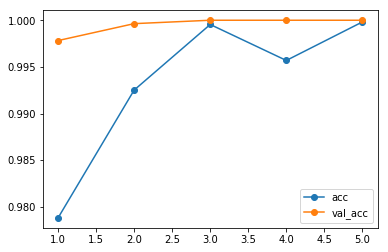

In [10]:
val_acc = hist.history['val_acc']
acc= hist.history['acc']
x= list(range(1,ep+1))

plt.plot(x,acc,marker='o',label = 'acc')
plt.plot(x,val_acc,marker='o',label = 'val_acc')

plt.legend()
plt.show()

**Plotting Losses over epochs**

Similarly losses are plotted


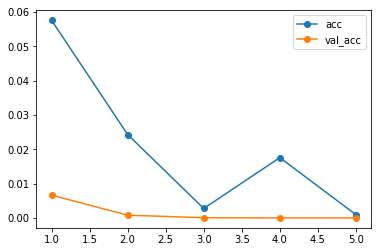

In [11]:
val_loss = hist.history['val_loss']
loss= hist.history['loss']

plt.plot(x,loss,marker='o',label = 'acc')
plt.plot(x,val_loss,marker='o',label = 'val_acc')

plt.legend()
plt.show()

**Checking if accuracy is indeed 1**

Since shuffle is False for the test_generator, we can predict on the test set data and compare the predictions to the test labels. This will verify if the accuracy is indeed 1 on the test set

In [12]:
test_gen.reset()
pred=model.predict_generator(test_gen,steps=STEP_SIZE_TEST, verbose=1)
pred = np.around(pred)
pred = pred.flatten()

np.array_equal(test_label,pred)


2756/2756 [==============================] - 8s 3ms/step


True